## EPS Example Notebook 

This notebook shows an example replicating previous the simple electric power system implemented in [IBFM](https://github.com/DesignEngrLab/IBFM) in the `eps example` directory, with some basic fault propagation and visualization.

In [1]:
from eps import EPS
import fmdtools.sim.propagate as propagate
import fmdtools.analyze as an

This script provides some example I/O for using static models, using the EPS system implemented in eps.py as an example.

A graphical representaiton of this system is shown below:

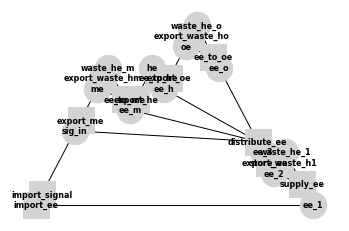

In [2]:
mdl= EPS()
fig, ax = an.graph.show(mdl.fxnflowgraph, gtype='fxnflowgraph')

As with dynamic models, in static models we use ``fp.run_one_fault`` to see the effects of single faults. All setup is performed in the Model class definition

In [3]:
resgraph, mdlhist = propagate.one_fault(mdl, 'ee_to_me', 'toohigh_torque', desired_result="fxnflowgraph")

In this case, however, the output in ``mdlhists`` will be a single-dimensional dictionary (not something we can plot very well)

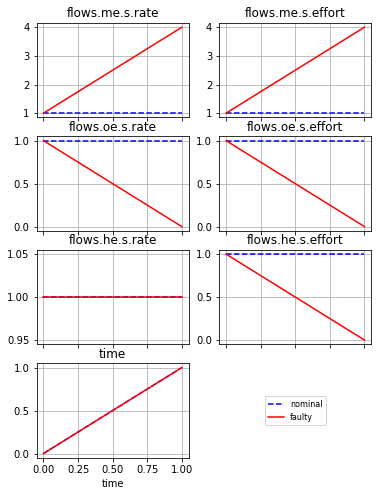

In [4]:
fig, ax = an.plot.mdlhists(mdlhist, *mdlhist.nominal.keys())

As a result, it's better to look at the results graph for a visualization of what went wrong. In this case ``resgraph`` better represents the fault propagation of the system than in a dynamic model, since there is only one time-step to represent (rather than a set)

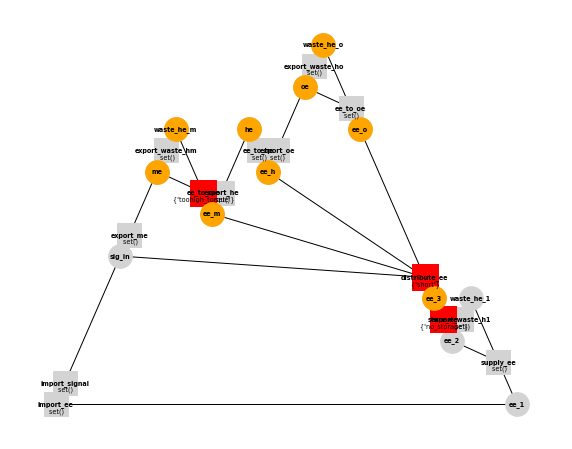

In [5]:
fig, ax = an.graph.show(resgraph['fxnflowgraph'], scale=0.8, figsize=(10,8))

We can run the set of single-fault scenarios on this model using ``fmdtools.sim.propagate.single_faults``. For single-fault scenarios, one does not need to use a ``SampleApproach``, since all faults are injected at a single time-step.

In [6]:
endclasses, mdlhists = propagate.single_faults(mdl, staged=True)

SCENARIOS COMPLETE: 100%|█████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 101.36it/s]


Using ``make_summarytable``, one can see the degradation effects of this fault on the flows:

In [7]:
mdlhists['import_ee low_v, t=0.flows.me.s.rate']

array([0.5, 0.5])

In [8]:
an.tabulate.result_summary_fmea(endclasses, mdlhists, *mdl.fxns, *mdl.flows)

,degraded,faulty,rate,cost,expected cost
"supply_ee major_overload, t=1","['me', 'oe', 'he']",[],0.000006,3650.0,959.22
"distribute_ee poor_alloc, t=0","['me', 'oe', 'he']",[],0.00004,1750.0,3066.0
"supply_ee adverse_resist, t=0","['me', 'oe', 'he']",[],0.000004,1650.0,289.08
"export_waste_h1 ineffective_sink, t=0",[],[],0.00001,1000.0,438.0
"ee_to_he high_heat, t=1",['he'],[],0.0,2500.0,21.9
...,...,...,...,...,...
"supply_ee minor_overload, t=1","['me', 'oe', 'he']",[],0.00002,5150.0,4511.4
"store_ee no_storage, t=1","['me', 'oe', 'he']",[],0.00001,3250.0,1423.5
"ee_to_he open_circuit, t=0",['he'],[],0.0,550.0,4.818
"store_ee low_storage, t=1",[],[],0.00001,2000.0,876.0
